# **Linear Algebra** 





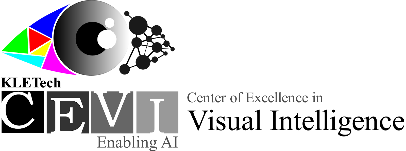

 
06/07/2022 <br>
code by Tejas Anvekar <br>
Speaker Tejas Anvekar


## LU Factorization


We saw in the last section that given two matrices, $A$ and $B$, of compatible shapes, we are able to define the product matrix $C=AB$ in a useful way.  In this section we discuss the factorization of a matrix.  One might naturally ask if it is possible to start with matrix $C$ and determine the two matrix factors $A$ and $B$.  As it turns out, a useful course of action is to look for matrix factors that have a particular structure.

One such factorization, that is closely related to the elimination process, is known as the LU Factorization.  Given a matrix $A$, we will look for matrices $L$ and $U$ such that 

- $LU = A$
- $L$ is a lower triangular matrix with main diagonal entries equal to 1.
- $U$ is an upper triangular matrix.

Here is a visualization of what we are seeking.


$$
\begin{equation}
A = \left[ \begin{array}{cccc} * & * & * & * \\ * & * & * & * \\ * & * & * & * \\ * & * & * & *  \end{array}\right]\hspace{1cm}
L = \left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ * & 1 & 0 & 0 \\ * & * & 1 & 0 \\ * & * & * & 1 \end{array}\right]\hspace{1cm}
U = \left[ \begin{array}{cccc} * & * & * & * \\ 0 & * & * & * \\ 0 & 0 & * & * \\ 0 & 0 & 0 & *  \end{array}\right]\hspace{1cm}
\end{equation}
$$

Before we tackle the problem of calculating $L$ and $U$ from a known matrix $A$, let's see why such a factorization is useful.  Suppose that we have found $L$ and $U$ so that $A=LU$ and we wish to solve the system $AX=B$.  Another way to write the problem is $LUX=B$.  We can then define another unknown $Y$ by saying that $UX=Y$, and exchange the a single system $AX=B$ for following two systems.

$$
\begin{eqnarray*}
UX & = & Y\\
LY & = & B 
\end{eqnarray*}
$$

While it is true that we have in fact doubled the number of equations, the two systems that we have are triangular and can be solved easily with back (or forward) substitution.  The first example shows the details for specific system.

### Example 1:  Soving a system using LU factorization

We want to solve the system of equations.

$$
\left[ \begin{array}{ccc} 3 & -1 & -2 \\ 6 & -1 & 0  \\ -3 & 5 & 20  \end{array}\right]X = 
\left[ \begin{array}{c} -4 \\ -8 \\ 6  \end{array}\right]\hspace{1cm}
$$

where $X$ is an unknown $3\times 1$ vector.  Suppose we also have computed $L$ and $U$.

$$
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ 2 & 1 & 0  \\ -1 & 4 & 1  \end{array}\right] \hspace{2cm} 
U = \left[ \begin{array}{ccc} 3 & -1 & -2 \\ 0 & 1 & 4  \\ 0 & 0 & 2  \end{array}\right] 
$$


In [2]:
import numpy as np
import laguide as lag
import scipy.linalg as sla

## Use Python to check for yourself that LU = A.

Now let's write out the systems $UX=Y$ and $LY = B$.  For the sake of clarity, we leave the matrix notation aside for a moment and use the variables $x_1$, $x_2$, and $x_3$ for the entries of $X$ and the variables $y_1$, $y_2$, and $y_3$ for the entries of $Y$.


$$
\begin{eqnarray*}
x_1 \hspace{2.1cm}& = & y_1\\
2x_1 + x_2 \hspace{1.1cm}& = & y_2\\
-x_1 + 4x_2 +x_3 & = & y_3 \\
\\
3y_1 - y_2 - 2y_3 & = & -4\\
y_2 + 4y_3 & = & -8\\
2y_3 & = & 6 
\end{eqnarray*}
$$

Now the solution is a matter of substitution.  The last equation tells us $y_3$.  From there we work backwards to find $y_2$ and $y_1$.  Then we go the first three equations to determine the $x$ values in a similar way, starting this time with the very first equation and working our way down.

### Elementary matrices

In order to understand how we can construct the LU factorization through elimination, it helpful to see that the steps of elimination can be carried out by multiplication with special matrices called **elementary matrices**.  Elementary matrices are the result of applying either a $\texttt{RowScale}$ or $\texttt{RowAdd}$ operation to the identity matrix of compatible shape.  (*Remember that rearranging the rows is only necessary if a 0 arises in a pivot position.  We will address row swaps shortly.*) 

For an example, let's apply one of these operations to a $4\times 4$ identity matrix.

In [3]:
I = np.eye(4)
E = lag.RowAdd(I,1,2,-3)
print(I,'\n')
print(E)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0. -3.  1.  0.]
 [ 0.  0.  0.  1.]]


The $E$ that we get is the result of adding -3 times the first row of $I$ to the third row of $I$.  The interesting property of the elementary matrix $E$ is that if we multiply another matrix $A$ by $E$, the result will be a the matrix we would get by applying the same row operation to $A$.

In [4]:
A=np.array([[1,2,0,-1],[-1,1,-1,4],[2,13,-4,9],[-2,5,-3,13]])
print(A,'\n')
print(E@A)

[[ 1  2  0 -1]
 [-1  1 -1  4]
 [ 2 13 -4  9]
 [-2  5 -3 13]] 

[[ 1.  2.  0. -1.]
 [-1.  1. -1.  4.]
 [ 5. 10. -1. -3.]
 [-2.  5. -3. 13.]]


### Example 2:  Finding an LU factorization

We can now carry out the elimination by applying a sequence of elementary matrices $E_1$, $E_2$, $E_3$,...to $A$.  Let's see how it works for the matrix above.

In [5]:
A=np.array([[1,2,0,-1],[-1,1,-1,4],[2,13,-4,9],[-2,5,-3,13]])
I = np.eye(4)
E1 = lag.RowAdd(I,0,1,1)
E2 = lag.RowAdd(I,0,2,-2)
E3 = lag.RowAdd(I,0,3,2)
print(E3@E2@E1@A,'\n')
E4 = lag.RowAdd(I,1,2,-3)
E5 = lag.RowAdd(I,1,3,-3)
print(E5@E4@E3@E2@E1@A)

[[ 1.  2.  0. -1.]
 [ 0.  3. -1.  3.]
 [ 0.  9. -4. 11.]
 [ 0.  9. -3. 11.]] 

[[ 1.  2.  0. -1.]
 [ 0.  3. -1.  3.]
 [ 0.  0. -1.  2.]
 [ 0.  0.  0.  2.]]


After using $\texttt{RowAdd}$ to create zeros in the appropriate spaces, we now have the $U$ factor.  Writing out the matrix multiplication in symbols it looks like this.

$$
\begin{equation}
E_5E_4E_3E_2E_1A = U
\end{equation}
$$

Note that the order of the multiplications cannot be changed.  $E_1$ should be the first to multiply $A$, then $E_2$, and so on.  Now let us manipulate the symbols a bit based on the properties of inverse matrices.

$$
\begin{eqnarray}
A &=& (E_5E_4E_3E_2E_1)^{-1}U  \\
A &=& E_1^{-1}E_2^{-1}E_3^{-1}E_4^{-1}E_5^{-1}U  
\end{eqnarray}
$$

It must be that $L = E_1^{-1}E_2^{-1}E_3^{-1}E_4^{-1}E_5^{-1}$.  The fact that this product of inverse elementary matrices has the correct form to be $L$ is not at all clear.  Let's make the following two observations.

- Each of the inverse elementary matrices has a simple lower triangular structure.  In fact, the matrix $E_3^{-1}$ is also an elementary matrix.  It is the elementary matrix that undoes the row operation represented by $E_3$!  Multiplication by $E_3$ adds 2 times the first row to the last row.  Multiplication by $E_3^{-1}$ adds -2 times the first row to the last row.

In [6]:
print(E3,'\n')
print(sla.inv(E3))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [2. 0. 0. 1.]] 

[[ 1. -0. -0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [-2.  0.  0.  1.]]


- Multiplying two lower triangular matrices together produces a lower triangular matrix.  Look at any example and try to figure out why.

In [7]:
L1 = np.array([[1,0,0,0],[-1,1,0,0],[2,3,1,0],[-2,3,0,1]])
L2 = np.array([[1,0,0,0],[2,1,0,0],[-5,4,1,0],[4,4,1,1]])
print(L1,'\n')
print(L2,'\n')
print(L1@L2)

[[ 1  0  0  0]
 [-1  1  0  0]
 [ 2  3  1  0]
 [-2  3  0  1]] 

[[ 1  0  0  0]
 [ 2  1  0  0]
 [-5  4  1  0]
 [ 4  4  1  1]] 

[[1 0 0 0]
 [1 1 0 0]
 [3 7 1 0]
 [8 7 1 1]]


These two facts together tell us that the matrix $E_1^{-1}E_2^{-1}E_3^{-1}E_4^{-1}E_5^{-1}$ has the correct structure to be the $L$ factor.  What is even more convenient is that when we multiply these inverse elementary matrices together, the nonzero  entries in the lower triangular portions do not change. 

In [8]:
print(sla.inv(E5),'\n')
print(sla.inv(E4)@sla.inv(E5),'\n')
print(sla.inv(E3)@sla.inv(E4)@sla.inv(E5))

[[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  3.  0.  1.]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 3. 1. 0.]
 [0. 3. 0. 1.]] 

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  3.  1.  0.]
 [-2.  3.  0.  1.]]


The nonzero lower triangular entries in $E_3^{-1}E_4^{-1}E_5^{-1}$ are the same as the corresponding entries of $E_3^{-1}$, $E_4^{-1}$, and $E_5^{-1}$.  This means that the entries in $L$ are just the scale factors used in our application of $\texttt{RowAdd}$, multiplied by -1.  Now that we understand how these elementary matrices combine to produce $L$, we don't actually need to construct them.  We can just compute $L$ as we do the row operations by keeping track of the scale factors.  

In [9]:
L = np.array([[1,0,0,0],[-1,1,0,0],[2,3,1,-0],[-2,3,0,1]])
U = np.array([[1,2,0,-1],[0,3,-1,3],[0,0,-1,2],[0,0,0,2]])
print("L:",'\n',L,'\n',sep='')
print("U:",'\n',U,'\n',sep='')
print("LU:",'\n',L@U,sep='')

L:
[[ 1  0  0  0]
 [-1  1  0  0]
 [ 2  3  1  0]
 [-2  3  0  1]]

U:
[[ 1  2  0 -1]
 [ 0  3 -1  3]
 [ 0  0 -1  2]
 [ 0  0  0  2]]

LU:
[[ 1  2  0 -1]
 [-1  1 -1  4]
 [ 2 13 -4  9]
 [-2  5 -3 13]]


### Permutation matrices

As we have seen in the previous section, it is sometimes necessary to rearrange the rows of a matrix when performing elimination.  This row operation can also be done by multiplying the matrix with an elementary matrix.  Let's build a matrix $P$ that performs an exchange of rows 2 and 3 in a $4\times 4$ matrix.  Again, we can do this by performing the same row operation on the identity matrix.  

In [10]:
C = np.random.randint(-6,6,size=(4,4))
I = np.eye(4)
P = lag.RowSwap(I,1,2)

print("C:",'\n',C,'\n',sep='')
print("P:",'\n',P,'\n',sep='')
print("PC:",'\n',P@C,sep='')

C:
[[ 4 -1  3 -6]
 [-2 -1 -2 -3]
 [-2 -2 -4  0]
 [ 0 -3  3  5]]

P:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

PC:
[[ 4. -1.  3. -6.]
 [-2. -2. -4.  0.]
 [-2. -1. -2. -3.]
 [ 0. -3.  3.  5.]]


When the row operation is a row swap, it is common to refer to the corresponding elementary matrix as a **permutation matrix**, and use the letter $P$ to represent it.  We will follow this convention.  It is also useful to note that an elementary permutation matrix is its own inverse since the operation of swapping two rows can be reversed by performing the exact same operation.  We can check that $PP=I$, which means that $P=P^{-1}$.

In [11]:
print(P@P)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Note that if a permutation represents more than a single row exchange, then its inverse must represent those row exhanges applied in the reverse order.

### Example 3:  Factoring with row swaps

In order to understand how the row swaps are incorporated into the factorization, it is most helpful to see an example.  In this $4\times 4$ example, we will use our $\texttt{laguide}$ functions to carry out the elimination and build the corresponding elementary matrices along the way.  For the $\texttt{RowAdd}$ operations, we will label the elementary matrix with an $L$, and for the $\texttt{RowSwap}$ operations we will use the label $P$.

In [12]:
B = np.array([[1,2,-1,-1],[4,8,-4,2],[1,1,1,2],[3,3,4,4]])
print(B)

[[ 1  2 -1 -1]
 [ 4  8 -4  2]
 [ 1  1  1  2]
 [ 3  3  4  4]]


In [13]:
B = lag.RowAdd(B,0,1,-4)
L1 = lag.RowAdd(I,0,1,-4)

B = lag.RowAdd(B,0,2,-1)
L2 = lag.RowAdd(I,0,2,-1)

B = lag.RowAdd(B,0,3,-3)
L3 = lag.RowAdd(I,0,3,-3)

print(B)

[[ 1.  2. -1. -1.]
 [ 0.  0.  0.  6.]
 [ 0. -1.  2.  3.]
 [ 0. -3.  7.  7.]]


In [14]:
B = lag.RowSwap(B,1,2)
P1 = lag.RowSwap(I,1,2)

print(B)

[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0.  0.  0.  6.]
 [ 0. -3.  7.  7.]]


In [15]:
B = lag.RowAdd(B,1,3,-3)
L4 = lag.RowAdd(I,1,3,-3)

print(B)

[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0.  0.  0.  6.]
 [ 0.  0.  1. -2.]]


In [16]:
B = lag.RowSwap(B,2,3)
P2 = lag.RowSwap(I,2,3)

print(B)

[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0.  0.  1. -2.]
 [ 0.  0.  0.  6.]]


In terms of matrix multiplication, we have carried out the matrix product $P_2L_4P_1L_3L_2L_1B = U$, as we can check.

In [17]:
B = np.array([[1,2,-1,-1],[4,8,-4,2],[1,1,1,2],[3,3,4,4]])
U = P2@L4@P1@L3@L2@L1@B
print(U)

[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0.  0.  1. -2.]
 [ 0.  0.  0.  6.]]


As we see with a calculation in the next cell, the inverse matrix $(P_2L_4P_1L_3L_2L_1)^{-1}$ does not have the correct lower triangular structure to be the $L$ factor.    In fact there are no matrices $L$ and $U$ with the correct triangular structure such that $B=LU$ for this particular matrix $B$.

In [18]:
possible_L = sla.inv(P2@L4@P1@L3@L2@L1)
print(possible_L)

[[1. 0. 0. 0.]
 [4. 0. 0. 1.]
 [1. 1. 0. 0.]
 [3. 3. 1. 0.]]


Although this matrix does not have the correct structure, we might notice that it is only a matter of rearranging the rows to produce a lower triangular matrix.  In fact, the row swaps that are needed here are *exactly the same* as those used in the elimination process.  

In [19]:
L = P2@P1@possible_L
print(L)

[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [3. 3. 1. 0.]
 [4. 0. 0. 1.]]


Now let's put all of this together to make the factorization of $B$.  Elimination gives us that $B = (P_2L_4P_1L_3L_2L_1)^{-1}U$, but the matrix $(P_2L_4P_1L_3L_2L_1)^{-1}$ is not lower triangular.  We can produce a lower triangular factor by multiplying by the permutation matrices that produce the required row swaps.

$$
P_2P_1B = P_2P_1(P_2L_4P_1L_3L_2L_1)^{-1}U
$$

We will label $P_2P_1(P_2L_4P_1L_3L_2L_1)^{-1}$ as $L$, since it now has the correct structure.  The end result is that $B=PLU$ where $P=(P_2P_1)^{-1}$.  To compute the inverse of the permutation matrix, we can simply apply the row swaps in the reverse order, so that $P=P_1P_2$.

In [20]:
P = P1@P2
print("P\n",P,'\n',sep='')
print("L\n",L,'\n',sep='')
print("U\n",U,'\n',sep='')
print("PLU\n",P@L@U,sep='')

## Note the optional argument sep='' to print eliminates the space usually included between printed items

P
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

L
[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [3. 3. 1. 0.]
 [4. 0. 0. 1.]]

U
[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0.  0.  1. -2.]
 [ 0.  0.  0.  6.]]

PLU
[[ 1.  2. -1. -1.]
 [ 4.  8. -4.  2.]
 [ 1.  1.  1.  2.]
 [ 3.  3.  4.  4.]]


The important point here is that if row swaps are used during elimination, a permutation matrix will be required in the factorization in order for $L$ to have the desired triangular structure.  Therefore in general we expect that $B=PLU$ where $P$ represents all the row swaps that occur during elimination.  

Another way to arrive at this result is to realize that if we performed the required row swaps *before* starting the elimination process, they would not interfere with the structure of $L$.  Let's give it a try!

In [21]:
B = np.array([[1,2,-1,-1],[4,8,-4,2],[1,1,1,2],[3,3,4,4]])
B = lag.RowSwap(B,1,2)
B = lag.RowSwap(B,2,3)
print(B)

[[ 1.  2. -1. -1.]
 [ 1.  1.  1.  2.]
 [ 3.  3.  4.  4.]
 [ 4.  8. -4.  2.]]


In [22]:
B = lag.RowAdd(B,0,1,-1)
L1 = lag.RowAdd(I,0,1,-1)

B = lag.RowAdd(B,0,2,-3)
L2 = lag.RowAdd(I,0,2,-3)

B = lag.RowAdd(B,0,3,-4)
L3 = lag.RowAdd(I,0,3,-4)

print(B)

[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0. -3.  7.  7.]
 [ 0.  0.  0.  6.]]


In [23]:
B = lag.RowAdd(B,1,2,-3)
L4 = lag.RowAdd(I,1,2,-3)

print(B)

[[ 1.  2. -1. -1.]
 [ 0. -1.  2.  3.]
 [ 0.  0.  1. -2.]
 [ 0.  0.  0.  6.]]


The process has given us $L_4L_3L_2L_1P_2P_1B=U$. Now $(L_4L_3L_2L_1)^{-1}$ has the correct structure, and is the same matrix $L$ that we produced in the previous calculation. 

In [24]:
L = sla.inv(L4@L3@L2@L1)
print(L)

[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [3. 3. 1. 0.]
 [4. 0. 0. 1.]]


### PLU factorization with SciPy

The SciPy $\texttt{linalg}$ function for finding $PLU$ factorizations is called $\texttt{lu}$.  This function accepts the array to be factored as an argument, and returns three arrays representing $P$, $L$, and $U$, in that order.  To store these arrays for later use, we need to provide three names that will be assigned to the output of $\texttt{lu}$.  

In [25]:

B = np.array([[1,2,-1,-1],[4,8,-4,2],[1,1,1,2],[3,3,4,4]])
P,L,U = sla.lu(B)

print("P\n",P,'\n',sep='')
print("L\n",L,'\n',sep='')
print("U\n",U,'\n',sep='')
print("PLU\n",P@L@U,sep='')

P
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

L
[[ 1.          0.          0.          0.        ]
 [ 0.75        1.          0.          0.        ]
 [ 0.25        0.33333333  1.          0.        ]
 [ 0.25       -0.         -0.          1.        ]]

U
[[ 4.          8.         -4.          2.        ]
 [ 0.         -3.          7.          2.5       ]
 [ 0.          0.         -0.33333333  0.66666667]
 [ 0.          0.          0.         -1.5       ]]

PLU
[[ 1.  2. -1. -1.]
 [ 4.  8. -4.  2.]
 [ 1.  1.  1.  2.]
 [ 3.  3.  4.  4.]]


We can see that the $\texttt{lu}$ function produced matrices $P$, $L$, and $U$ such that $B=PLU$, but the factors are different than those we found using our own row operations.  Both factorizations are correct as we can see.  It is important to realize that the factorization of $B$ into $PLU$ is not unique since there is a choice to be made in which rows get swapped.  Instead of only requiring that pivot elements are non-zero, the SciPy function chooses row swaps using a more advanced method in order to minimize potential roundoff error.

SciPy can also be used to solve a system $AX=B$ by using the $PLU$ factorization of $A$ together with back and forward substitution.  To do this we use $\texttt{lu_factor}$ to factor and $\texttt{lu_solve}$ to carry out the substitutions. 

In [26]:
A = np.array([[1,2,-1,-1],[4,8,-4,2],[1,1,1,2],[3,3,4,4]])
X_true = np.array([[1],[0],[1],[0]])
B = A@X_true

## lu_factor returns two objects which store the information needed to reconstruct the factorization
## We store it all in a single object called 'factorization', which can then be passed to lu_solve
factorization = sla.lu_factor(A)
X_computed = sla.lu_solve(factorization,B)

print("Computed solution X:\n",X_computed,'\n',sep='')


Computed solution X:
[[ 1.]
 [-0.]
 [ 1.]
 [-0.]]



The results returned from $\texttt{lu_factor}$ are not the same as those returned from $\texttt{lu}$.  The underlying factorization is the same, but the information is compressed into a more efficient format.  

### Exercises

**Exercise 1:** Solve $ AX = B $ using $ A = LU $ and the $L$, $U$, and $B$ given below.  Compute $LUX$ to verify your answer. 

$$
\begin{equation}
A = \left[ \begin{array}{ccc} 5 & 2 & 1 \\ 5 & 3 & 0 \\ -5 & -2 & -4  \end{array}\right] \hspace{2cm} 
B = \left[ \begin{array}{c} 4 \\ 7 \\ 8  \end{array}\right] \hspace{2cm} 
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 0  \\ -1 & 0 & 1  \end{array}\right] \hspace{2cm} 
U = \left[ \begin{array}{ccc} 5 & 2 & 1 \\ 0 & 1 & -1  \\ 0 & 0 & 3  \end{array}\right] 
\end{equation}
$$

In [27]:
## Code solution here.
A = np.array([[5,2,1],[5,3,0],[-5,-2,-4]])
B = np.array([[4],[7],[8]])
L = np.array([[1,0,0],[1,1,0],[-1,0,1]])
U = np.array([[5,2,1],[0,1,-1],[0,0,3]])
A = L@U
A_in = sla.inv(A)
X = A_in@B
X

array([[-2.8],
       [ 7. ],
       [ 4. ]])

**Exercise 2:** Solve $ AX = B $ using $ A = LU $ and the $L$, $U$, and $B$ given below.  Compute $LUX$ to verify your answer. 

$$
\begin{equation}
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1  \end{array}\right] \hspace{2cm} 
U = \left[ \begin{array}{ccc} 1 & -1 & 0 \\ 0 & 1 & -1  \\ 0 & 0 & 1  \end{array}\right] \hspace{2cm} 
B = \left[ \begin{array}{c} 2 \\ -3 \\ 4  \end{array}\right] 
\end{equation}
$$

In [35]:
## Code solution here.
B = np.array([[2],[-3],[4]])
L = np.array([[1,0,0],[-1,1,0],[0,-1,1]])
U = np.array([[1,-1,0],[0,1,-1],[0,0,1]])
A = L@U
A_in = sla.inv(A)
X = A_in@B
X

array([[4.],
       [2.],
       [3.]])

**Exercise 3:** Write a function called $\texttt{ForwardSubstitution}$ that will solve a lower triangular system $LY=B$.  It will be helpful to go back and look at the code for $\texttt{BackSubstitution}$.

In [29]:
## Code solution here.

**Exercise 4:** Let $A$, $B$, and $C$ be the following matrices:

  $$
\begin{equation}
A = \left[ \begin{array}{ccc} 1 & 2 & 4 \\ 2 & 1 & 3 \\ 1 & 0 & 2  \end{array}\right] \hspace{2cm} 
B = \left[ \begin{array}{ccc} 1 & 2 & 4 \\ 2 & 1 & 3  \\ 2 & 2 & 6  \end{array}\right] \hspace{2cm} 
C = \left[ \begin{array}{ccc} 1 & 2 & 4 \\ 0 & -1 & -3  \\ 2 & 2 & 6  \end{array}\right] 
\end{equation}
$$

$(a)$ Find an elementary matrix $E$ such that $EA = B$.  Verify with a computation.

$(b)$ Find an elementary matrix $F$ such that $ FB = C$.  Verify with a computation.
    

In [36]:
## Code solution here.
A = np.array([[1,2,4],[2,1,3],[1,0,2]])
B = np.array([[1,2,4],[2,1,3],[2,2,6]])
A_inverse = sla.inv(A)
E = A_inverse@B
E

array([[ 0.5 , -1.  , -2.  ],
       [-1.25, -1.5 , -5.  ],
       [ 0.75,  1.5 ,  4.  ]])

In [37]:
B = np.array([[1,2,4],[2,1,3],[1,0,2]])
C = np.array([[1,2,4],[2,1,3],[2,2,6]])
B_inverse = sla.inv(B)
F = B_inverse@C
F

array([[ 0.5 , -1.  , -2.  ],
       [-1.25, -1.5 , -5.  ],
       [ 0.75,  1.5 ,  4.  ]])

**Exercise 5:** Consider the following $3\times 3$  matrix :

$$
\begin{equation}
A = \left[ \begin{array}{rrr}  2 & 1 & 1\\  6 & 4 & 5  \\ 4 & 1 & 3 \end{array} \right] 
\end{equation}
$$

$(a)$ Find **elementary matrices** $E_1$, $E_2$, and $E_3$ such that $ E_3E_2E_1A = U $ where $U$ is an upper triangular matrix.

$(b)$ Find $L$ using the inverses of $E_1$, $E_2$, $E_3$, and verify that $  A = LU $.

In [31]:
## Code Solution here

**Exercise 6:** Compute the $LDU$ factorization of the following matrix and verify that $A = LDU$.

$$
\begin{equation}
A = \left[ \begin{array}{rrr}  1 & 1 & 1\\  3 & 5 & 6  \\ -2 & 2 & 7 \end{array} \right] 
\end{equation}
$$


In [32]:
## Code Solution here

**Exercise 7:** Find $P, L,$ and $U$ such that $PA = LU$.  Following the discussion in this section, $P$ should be a permutation matrix, $L$ should be a lower triangular matrix with ones long the main diagonal, and $U$ should be an upper triangular matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrr}  1 & 3 & 2\\  -2 & -6 & 1  \\ 2 & 5 & 7 \end{array} \right] 
\end{equation}
$$
    

In [33]:
## Code Solution here

**Exercise 8:** Use SciPy to compute the $PLU$ factorization of a $3\times 3$ matrix.  Replicate the results using the row operations functions in $\texttt{laguide}$.

In [34]:
## Code Solution here